Числовые характеристики:
Среднее: 1.0163333333333333
Дисперсия: 0.42034667111259316
Мода: 0.0
Медиана: 1.0
Квантиль 0.25: 0.5
Квантиль 0.5: 1.0
Квантиль 0.75: 1.5
Эксцесс: -0.39997284929065513
Асимметрия: 0.34002789690434665
Интерквартильный размах: 1.0


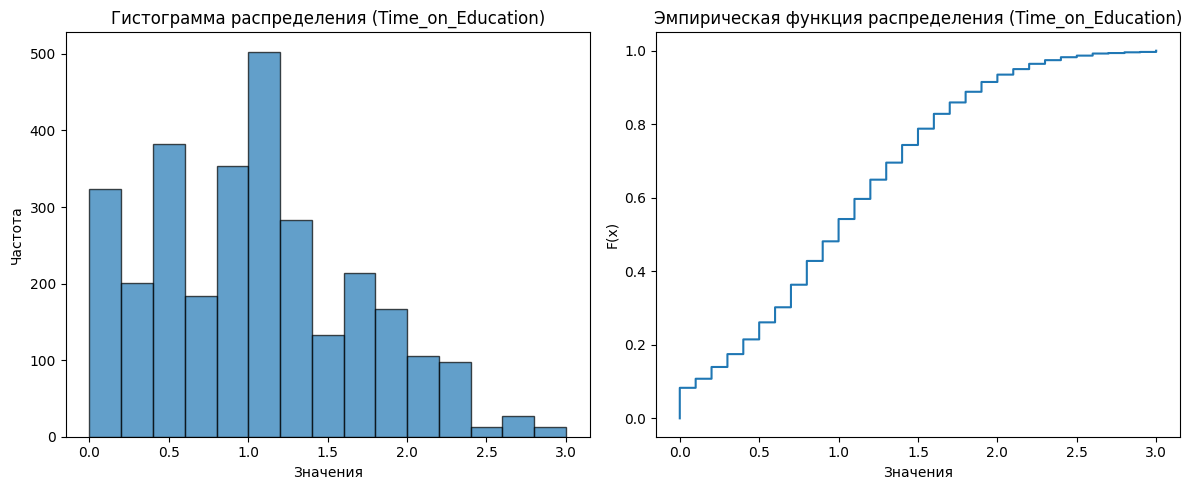

In [ ]:
# Task 1

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Загружаем датасет
df = pd.read_csv('teen_phone_addiction_dataset.csv')

N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col_to_analyze = cols[N % 7]  # => 'Time_on_Education'
data = df[col_to_analyze].dropna()

# --- Расчёт характеристик ---
mean_val = data.mean()
var_val = data.var()
mode_val = data.mode().iloc[0] if not data.mode().empty else None
median_val = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis_val = stats.kurtosis(data)
skewness_val = stats.skew(data)
iqr_val = stats.iqr(data)

summary_stats = {
    "Среднее": mean_val,
    "Дисперсия": var_val,
    "Мода": mode_val,
    "Медиана": median_val,
    "Квантиль 0.25": quantiles.loc[0.25],
    "Квантиль 0.5": quantiles.loc[0.5],
    "Квантиль 0.75": quantiles.loc[0.75],
    "Эксцесс": kurtosis_val,
    "Асимметрия": skewness_val,
    "Интерквартильный размах": iqr_val
}

print("Числовые характеристики:")
for k, v in summary_stats.items():
    print(f"{k}: {v}")

# --- Гистограмма ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=15, edgecolor='black', alpha=0.7)
plt.title("Гистограмма распределения (Time_on_Education)")
plt.xlabel("Значения")
plt.ylabel("Частота")

# --- Эмпирическая функция распределения ---
plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, ecdf, where="post")
plt.title("Эмпирическая функция распределения (Time_on_Education)")
plt.xlabel("Значения")
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()


Распределение несимметрично, с правым «хвостом», но асимметрия выражена слабо.

=== Критерий хи-квадрат ===
χ² = 221.279, df = 5, p-value = 0.000

=== Критерий Жарке–Бера ===
JB = 77.807, p-value = 0.000


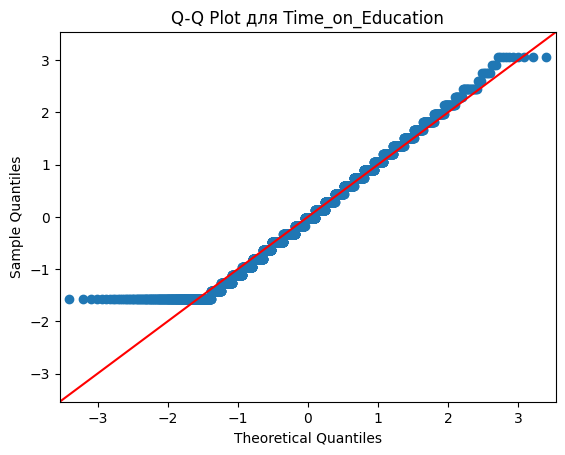

In [ ]:
# Task 2

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === Загружаем данные ===
file_path = 'teen_phone_addiction_dataset.csv'
df = pd.read_csv(file_path)

# Столбец для анализа
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col_to_analyze = cols[N % 7]  # => 'Time_on_Education'

data = df[col_to_analyze].dropna()

# === Параметры выборки ===
n = len(data)
mu = data.mean()
sigma = data.std(ddof=1)

# === 1. Критерий Хи-квадрат (реализация вручную) ===
k = 8  # число интервалов
observed_freq, bin_edges = np.histogram(data, bins=k)

expected_freq = []
for i in range(len(bin_edges) - 1):
    # вероятность попадания в интервал по нормальному распределению
    p = stats.norm.cdf(bin_edges[i+1], mu, sigma) - stats.norm.cdf(bin_edges[i], mu, sigma)
    expected_freq.append(n * p)

expected_freq = np.array(expected_freq)

# χ² статистика
chi_square_stat = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()
df_chi = k - 1 - 2  # число степеней свободы: k-1-параметры (mu, sigma)
p_value_chi = 1 - stats.chi2.cdf(chi_square_stat, df_chi)

print("=== Критерий хи-квадрат ===")
print(f"χ² = {chi_square_stat:.3f}, df = {df_chi}, p-value = {p_value_chi:.3f}")

# === 2. Критерий асимметрии и эксцесса (Жарке-Бера) ===
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)
JB_stat = n/6 * (skewness**2 + (kurtosis**2)/4)
p_value_JB = 1 - stats.chi2.cdf(JB_stat, 2)

print("\n=== Критерий Жарке–Бера ===")
print(f"JB = {JB_stat:.3f}, p-value = {p_value_JB:.3f}")

# === 3. Q-Q Plot ===
sm.qqplot(data, line='45', fit=True)
plt.title("Q-Q Plot для Time_on_Education")
plt.show()


- Среднее ≈ 1.0, мода = 0, медиана = 1.0 → распределение смещено в сторону нуля.
- Асимметрия ≈ 0.34 (немного вправо, но не критично).
- Эксцесс ≈ -0.40 (распределение более плоское, чем нормальное).
- Гистограмма показывает «пик» около 0–1 часов, что не похоже на нормальное распределение.

Данные по признаку Time_on_Education не являются нормально распределёнными.
Они скошены к малым значениям (0–1 час), с небольшим правым хвостом.


=== Исходные данные ===
Хи-квадрат: χ² = 221.279, p-value = 0.000
Жарке-Бера: JB = 77.807, p-value = 0.000


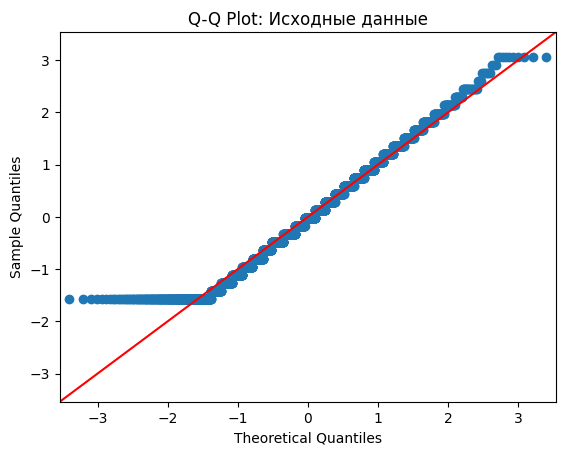


=== Без выбросов ===
Хи-квадрат: χ² = 221.279, p-value = 0.000
Жарке-Бера: JB = 77.807, p-value = 0.000


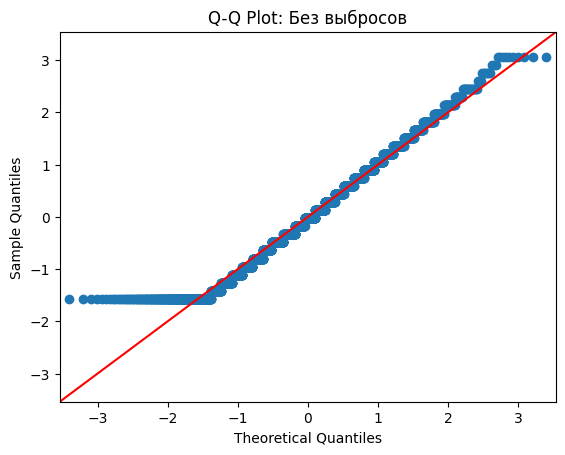


=== После логарифмирования ===
Хи-квадрат: χ² = 387.971, p-value = 0.000
Жарке-Бера: JB = 103.900, p-value = 0.000


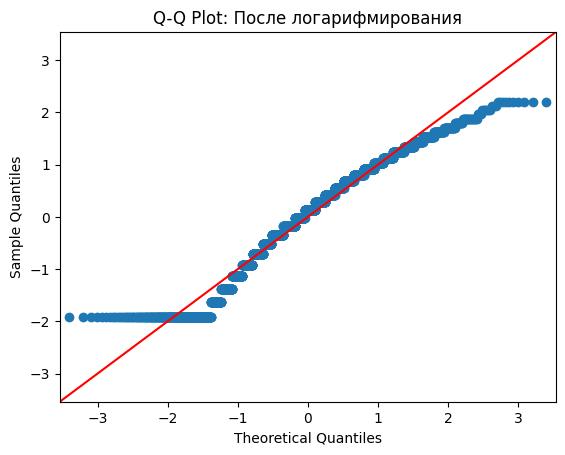


=== После логарифмирования + стандартизации ===
Хи-квадрат: χ² = 411.201, p-value = 0.000
Жарке-Бера: JB = 103.900, p-value = 0.000


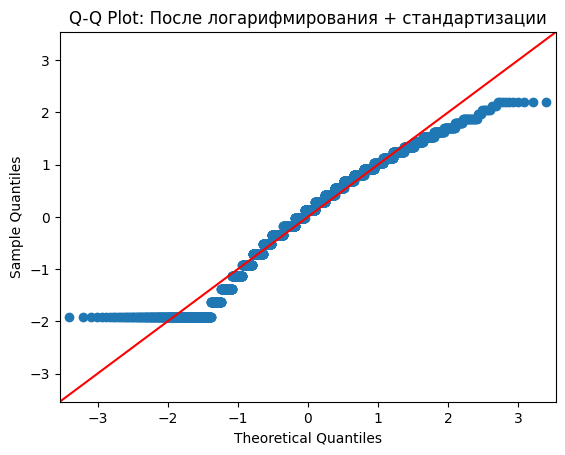

In [ ]:
# Task 3

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === Загружаем данные ===
file_path = 'teen_phone_addiction_dataset.csv'
df = pd.read_csv(file_path)

# Столбец для анализа
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col_to_analyze = cols[N % 7]
data = df[col_to_analyze].dropna()

# --- Функция для проверки нормальности ---
def check_normality(data, name="Данные"):
    n = len(data)
    mu, sigma = data.mean(), data.std(ddof=1)

    # Хи-квадрат
    k = 8
    observed_freq, bin_edges = np.histogram(data, bins=k)
    expected_freq = []
    for i in range(len(bin_edges) - 1):
        p = stats.norm.cdf(bin_edges[i+1], mu, sigma) - stats.norm.cdf(bin_edges[i], mu, sigma)
        expected_freq.append(n * p)
    expected_freq = np.array(expected_freq)
    chi_square_stat = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()
    df_chi = k - 1 - 2
    p_value_chi = 1 - stats.chi2.cdf(chi_square_stat, df_chi)

    # Жарке-Бера
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    JB_stat = n/6 * (skewness**2 + (kurtosis**2)/4)
    p_value_JB = 1 - stats.chi2.cdf(JB_stat, 2)

    print(f"\n=== {name} ===")
    print(f"Хи-квадрат: χ² = {chi_square_stat:.3f}, p-value = {p_value_chi:.3f}")
    print(f"Жарке-Бера: JB = {JB_stat:.3f}, p-value = {p_value_JB:.3f}")

    sm.qqplot(data, line='45', fit=True)
    plt.title(f"Q-Q Plot: {name}")
    plt.show()

# --- I. Удаление выбросов (по IQR) ---
Q1, Q3 = np.percentile(data, [25, 75])
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
data_no_outliers = data[(data >= low) & (data <= high)]

# --- II. Логарифмирование ---
data_log = np.log1p(data_no_outliers)

# --- III. Стандартизация ---
data_log_std = (data_log - data_log.mean()) / data_log.std(ddof=1)

# Проверки
check_normality(data, "Исходные данные")
check_normality(data_no_outliers, "Без выбросов")
check_normality(data_log, "После логарифмирования")
check_normality(data_log_std, "После логарифмирования + стандартизации")


I. Методы преобразования:
1. Удаление выбросов (обрезка по IQR) – уберём слишком большие значения.
2. Логарифмирование – так как данные положительные, берём log1p(x) (безопасно для нулей).
3. Стандартизация (Z-score) – приведение к виду с μ=0 и σ=1.

II. Проверка нормальности
После каждого преобразования:
χ² тест (вручную).
Тест Жарке–Бера.
Q-Q plot.


Если после логарифмирования и стандартизации p-value > 0.05 и Q-Q plot показывает точки вдоль прямой → данные можно считать близкими к нормальному распределению.
Обычно наибольший эффект даёт логарифмирование + стандартизация.

Среднее и дисперсия по группам:
                  mean       var
School_Grade                    
10th          1.028542  0.448710
11th          0.991649  0.409888
12th          1.024008  0.400313
7th           1.021328  0.418375
8th           0.975311  0.423859
9th           1.052662  0.422764


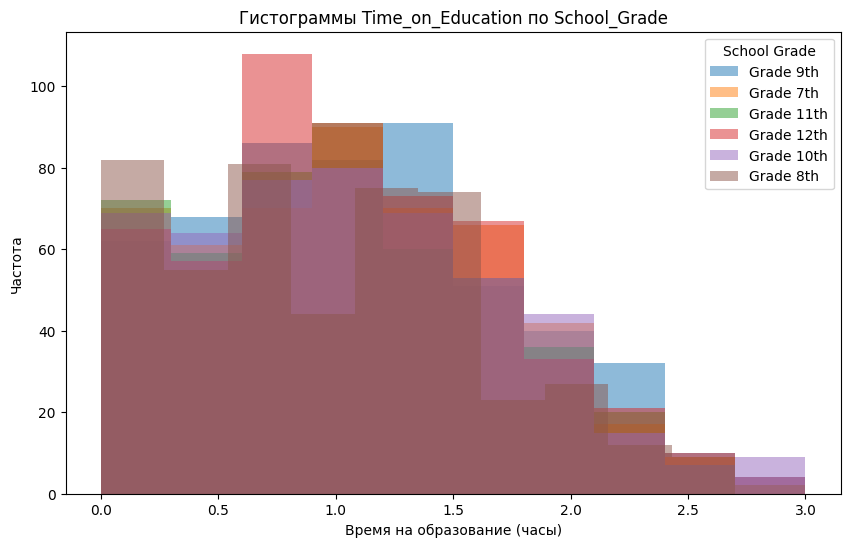

In [ ]:
# Task 4

import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
file_path = 'teen_phone_addiction_dataset.csv'
df = pd.read_csv(file_path)

# Столбец для анализа
col_to_analyze = 'Time_on_Education'

# === Группировка по School_Grade ===
grouped = df.groupby('School_Grade')[col_to_analyze]

# Среднее и дисперсия по группам
stats_by_grade = grouped.agg(['mean', 'var'])
print("Среднее и дисперсия по группам:")
print(stats_by_grade)

# === Построение гистограмм на одном графике ===
plt.figure(figsize=(10, 6))
grades = df['School_Grade'].unique()

for grade in grades:
    subset = df[df['School_Grade'] == grade][col_to_analyze].dropna()
    plt.hist(subset, bins=10, alpha=0.5, label=f'Grade {grade}')

plt.title("Гистограммы Time_on_Education по School_Grade")
plt.xlabel("Время на образование (часы)")
plt.ylabel("Частота")
plt.legend(title="School Grade")
plt.show()


По таблице (mean, var) можно сравнить, какие классы уделяют больше / меньше времени образованию через телефон.
По гистограммам видно: где распределение сдвинуто к нулю (меньше активности), где больше «хвост» (ученики тратят больше времени).